In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from seaborn.algorithms import bootstrap
from seaborn.utils import ci

from tmp.utils import formatter

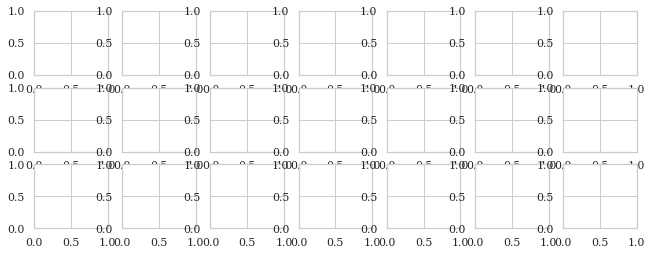

In [3]:
form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=False)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89", "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")

df["tweet_number"] = df["tweet number"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["retweet_number"] = df["retweet number"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["number_urls"] = df["number urls"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["mentions"] = df["mentions"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["mentions"] = df["mentions"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["number hashtags"] = df["number hashtags"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["baddies"] = df["baddies"] / (df["tweet number"] + df["retweet number"] + df["quote number"])

f, axzs = plt.subplots(3, 7, figsize=(10.8, 4))


In [4]:
attributes_all = [["sadness_empath", "swearing_terms_empath", "independence_empath",
                   "positive_emotion_empath", "negative_emotion_empath", "government_empath", "love_empath"],
                  ["ridicule_empath", "masculine_empath", "feminine_empath",
                   "violence_empath", "suffering_empath", "dispute_empath", "anger_empath"],
                  ["envy_empath", "work_empath", "politics_empath",
                   "terrorism_empath", "shame_empath", "confusion_empath", "hate_empath"]]

titles_all = [["Sadness", "Swearing", "Independence", "Pos. Emotions", "Neg. Emotions", "Government", "Love"],
              ["Ridicule", "Masculine", "Feminine", "Violence", "Suffering", "Dispute", "Anger"],
              ["Envy", "Work", "Politics", "Terrorism", "Shame", "Confusion", "Hate"]]

for axs, attributes, titles in zip(axzs, attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        N = 4
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:
            boots = bootstrap(category[attribute], func=np.nanmean, n_boot=1000)
            ci_tmp = ci(boots)
            average = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_average = (ci_tmp[1] - ci_tmp[0]) / 2
            averages.append(average)
            averages_ci.append(ci_average)
            boots = bootstrap(category[attribute], func=np.nanmedian, n_boot=1000)
            ci_tmp = ci(boots)
            median = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_median = (ci_tmp[1] - ci_tmp[0]) / 2
            medians.append(median)
            medians_ci.append(ci_median)

            tmp.append(category[attribute].values)

        ind = np.array([0, 1, 2, 3, 4, 5])
        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, s_ns = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(s_ns)

        rects = axis.bar(ind, averages, 0.6, yerr=averages_ci, color=color_mine,
                         ecolor="#212823", edgecolor=["#4D1A17"] * 6, linewidth=.3)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")


Sadness
4.5992823098250965e-17
6.689574245831005e-38
0.07077526373597313
Swearing
2.33440660136447e-22
1.9874190816299146e-32
0.0061517594404274
Independence
5.3968431757328194e-27
9.50530234230462e-30
9.412656222784008e-09
Pos. Emotions
1.338556116505718e-19
2.755549815397232e-44
6.744751742428638e-05
Neg. Emotions
7.192017524669761e-06
5.782728744561671e-05
0.4912865320655512
Government
3.903990029718243e-32
4.996028332598681e-55
0.3708417112980733
Love
4.743336457678033e-05
2.3858870200931743e-09
0.6364161018061163
Ridicule
1.759708740685487e-64
9.52926484057374e-176
3.674173917198816e-49
Masculine
7.478231778577757e-14
3.579753645850186e-15
0.0009388124411533704
Feminine
2.105823391292718e-06
1.8053140578877974e-14
0.0210359579102461
Violence
4.791542121828486e-49
6.739988855862999e-74
1.345401128951343e-82
Suffering
2.3213498041084266e-09
2.091959273186046e-31
4.168771361042055e-07
Dispute
9.403415279013138e-34
1.5145921453263933e-166
1.0157779634873915e-13
Anger
4.075119523763367

In [5]:
f.legend((rects[0], rects[1], rects[2], rects[3], rects[4], rects[5]),
         ('Hateful User', 'Normal User', 'Hateful Neigh.', 'Normal Neigh.', 'Suspended', 'Active'),
         loc='upper center',
         fancybox=True, shadow=True, ncol=6)
f.tight_layout(rect=[0, 0, 1, .95])
f.savefig("results/lexical.pdf")